In [ ]:
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
# Hyperparameters
batch_size = 100
e_hidden_layer_1 = 500 # encoder hidden layer 1 dimension
e_hidden_layer_2 = 250 # encoder hidden layer 2 dimension
d_hidden_layer_1 = 250 # decoder hidden layer 1 dimension
d_hidden_layer_2 = 500 # decoder hidden layer 2 dimension
latent_dim = 20 # latent (z) dimension
lr = 0.0005 # learning rate

In [ ]:
# Create data loader
train_dataset = MNIST("", transform=torchvision.transforms.ToTensor(), train=True, download=True)
test_dataset  = MNIST("", transform=torchvision.transforms.ToTensor(), train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False)

In [ ]:
# define encoder
class Encoder(nn.Module):
    def __init__(self, hidden_layer_1, hidden_layer_2, latent_dim):
        super(Encoder, self).__init__()
        self.layer_1 = nn.Linear(28*28, hidden_layer_1)
        self.layer_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.mu_layer = nn.Linear(hidden_layer_2, latent_dim)
        self.sigma_layer = nn.Linear (hidden_layer_2, latent_dim)

    def forward(self, x):
        y = F.relu(self.layer_1(x))
        y = F.relu(self.layer_2(y))
        mu = self.mu_layer(y)
        log_sigma = self.sigma_layer(y)
        return mu, log_sigma

# define decoder
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_layer_1, hidden_layer_2):
        super(Decoder, self).__init__()
        self.layer_1 = nn.Linear(latent_dim, hidden_layer_1)
        self.layer_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.layer_3 = nn.Linear(hidden_layer_2, 28*28)
        
    def forward(self, x):
        y = F.relu(self.layer_1(x))
        y = F.relu(self.layer_2(y))
        output = torch.sigmoid(self.layer_3(y))
        return output
        
# define the loss
def loss_function(x, x_hat, mu, log_sigma):
    reconstruction_loss = F.binary_cross_entropy(x_hat, x, reduction='sum')
    regularization_loss = - 0.5 * torch.sum(1+ log_sigma - mu.pow(2) - log_sigma.exp())
    return reconstruction_loss + regularization_loss

# define the VAE
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder
                
    def forward(self, x):
        mu, log_sigma = self.Encoder(x)
        sigma = torch.exp(0.5 * log_sigma)
        # reparametrization trick
        epsilon = torch.randn_like(sigma).to(device)
        z = mu + sigma*epsilon
        x_hat = self.Decoder(z)
        return x_hat, mu, log_sigma

# define the training function
def train(n_epochs):
    model.train()
    for epoch in range(n_epochs):
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.view(batch_size, 28*28).to(device)
            optimizer.zero_grad()
            x_hat, mu, log_sigma = model(x)
            loss = loss_function(x, x_hat, mu, log_sigma)
            loss.backward()
            optimizer.step()
        print(f"\tEpoch {epoch + 1} loss: {loss.item()/batch_size}")

# function to plot the outputs
def plot_generated_images():
    model.eval()
    f, axs = plt.subplots(8,8,figsize=(8,8))
    for i in range(8):
        for j in range(8):
            ax = plt.subplot(8,8,i*8+j+1)
            img = test_dataset[i*8+j][0].view(28*28).to(device)
            with torch.no_grad():
                x_hat,_,_ = model(img)
            plt.imshow(x_hat.cpu().view(28, 28).numpy(), cmap='gist_gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
device = torch.device("cuda")
encoder = Encoder(e_hidden_layer_1, e_hidden_layer_2, latent_dim)
decoder = Decoder(latent_dim, d_hidden_layer_1, d_hidden_layer_2)
model = Model(Encoder=encoder, Decoder=decoder).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

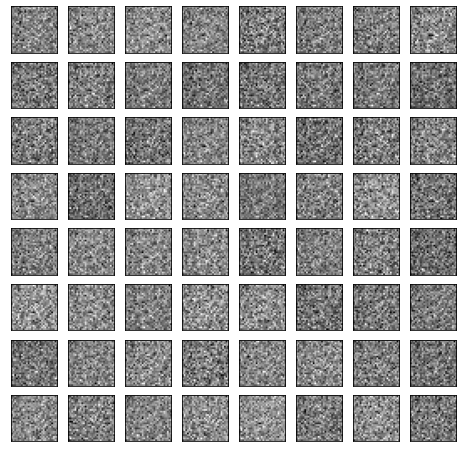

In [ ]:
# Before training
plot_generated_images()

In [ ]:
train(n_epochs=10)

	Epoch 1 loss: 139.06587890625
	Epoch 2 loss: 124.197607421875
	Epoch 3 loss: 114.8110546875
	Epoch 4 loss: 109.87955078125
	Epoch 5 loss: 107.89404296875
	Epoch 6 loss: 109.11634765625
	Epoch 7 loss: 110.199296875
	Epoch 8 loss: 106.460966796875
	Epoch 9 loss: 101.3978515625
	Epoch 10 loss: 107.53958984375


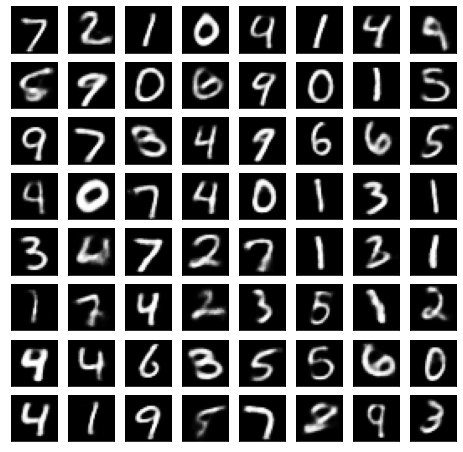

In [ ]:
# After training for 10 epochs
plot_generated_images()

In [ ]:
train(n_epochs=70)

	Epoch 1 loss: 100.504765625
	Epoch 2 loss: 98.50744140625
	Epoch 3 loss: 103.29615234375
	Epoch 4 loss: 102.06669921875
	Epoch 5 loss: 103.549169921875
	Epoch 6 loss: 99.14734375
	Epoch 7 loss: 100.301484375
	Epoch 8 loss: 101.242109375
	Epoch 9 loss: 102.3088671875
	Epoch 10 loss: 102.783017578125
	Epoch 11 loss: 99.707294921875
	Epoch 12 loss: 94.62423828125
	Epoch 13 loss: 96.8090625
	Epoch 14 loss: 100.238671875
	Epoch 15 loss: 100.77125
	Epoch 16 loss: 97.26775390625
	Epoch 17 loss: 98.7760546875
	Epoch 18 loss: 92.7012890625
	Epoch 19 loss: 100.1083203125
	Epoch 20 loss: 96.3116796875
	Epoch 21 loss: 96.448564453125
	Epoch 22 loss: 98.981572265625
	Epoch 23 loss: 93.971884765625
	Epoch 24 loss: 91.44525390625
	Epoch 25 loss: 97.71501953125
	Epoch 26 loss: 94.748115234375
	Epoch 27 loss: 98.8611328125
	Epoch 28 loss: 102.67240234375
	Epoch 29 loss: 96.84015625
	Epoch 30 loss: 101.3014453125
	Epoch 31 loss: 98.905869140625
	Epoch 32 loss: 96.81166015625
	Epoch 33 loss: 101.8531347

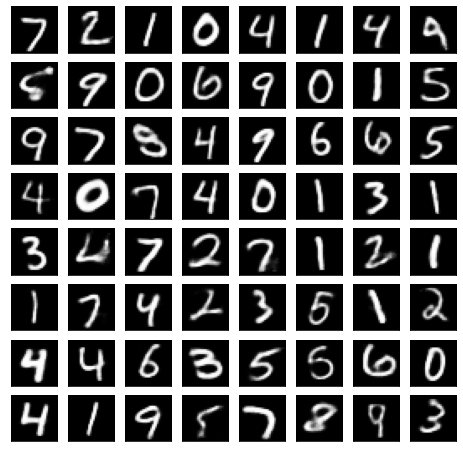

In [ ]:
# After training for 80 epochs
plot_generated_images()